# Memory analysis plots

In [72]:
import pandas as pd
res = pd.read_csv("res.csv")
tarjan = res[res.algo=="tarjan"].drop(columns=["algo"])
nuutila = res[res.algo=="nuutila"].drop(columns=["algo"])
pearce = res[res.algo=="pearce"].drop(columns=["algo"])

In [73]:
r = tarjan.merge(nuutila, on=["v","e"]).merge(pearce, on=["v","e"]).rename(columns={"mem_x":"tarjan","mem_y": "nuutila", "mem":"pearce"}).sort_values(by=["e"])

/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


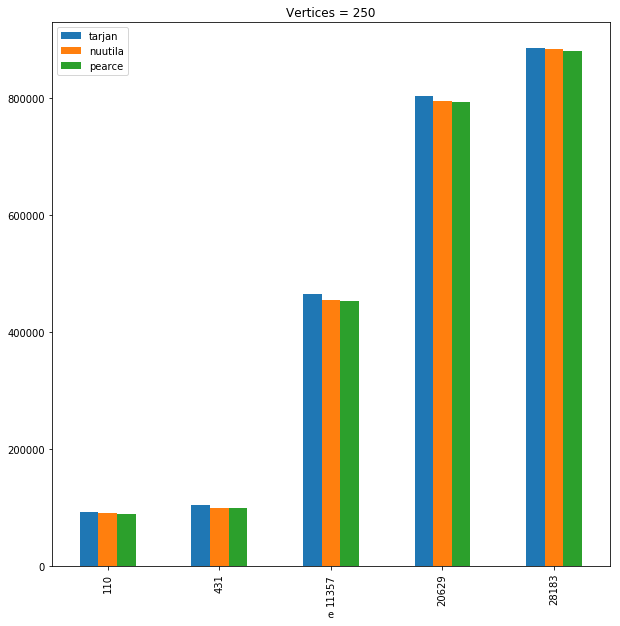

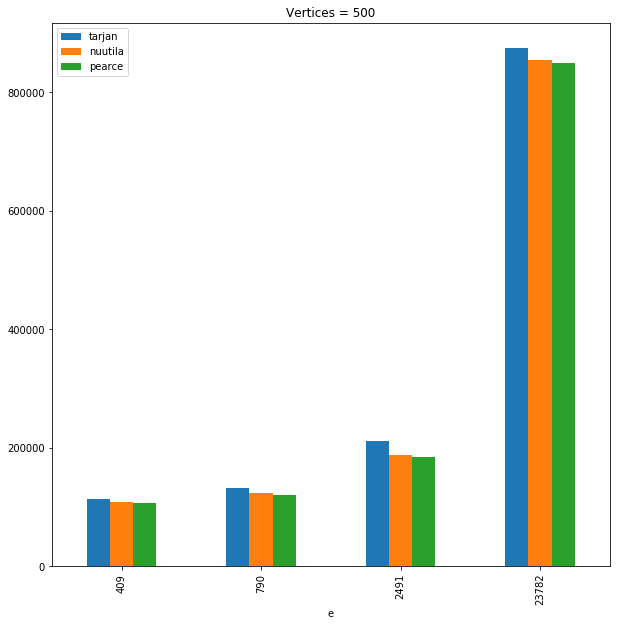

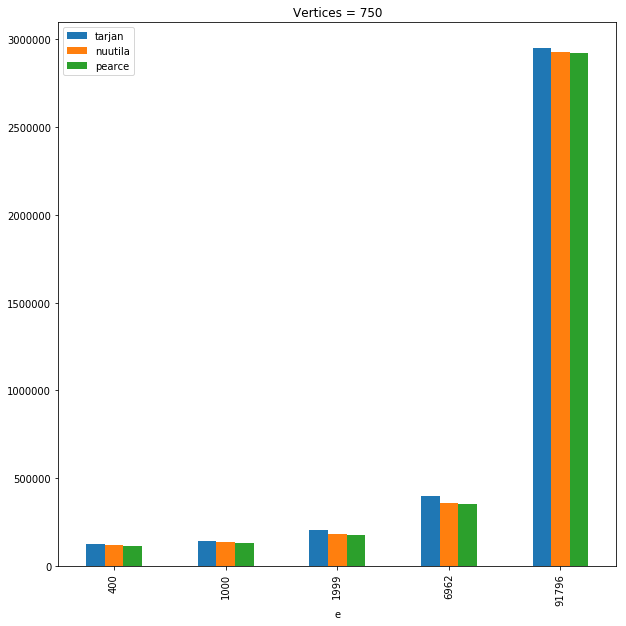

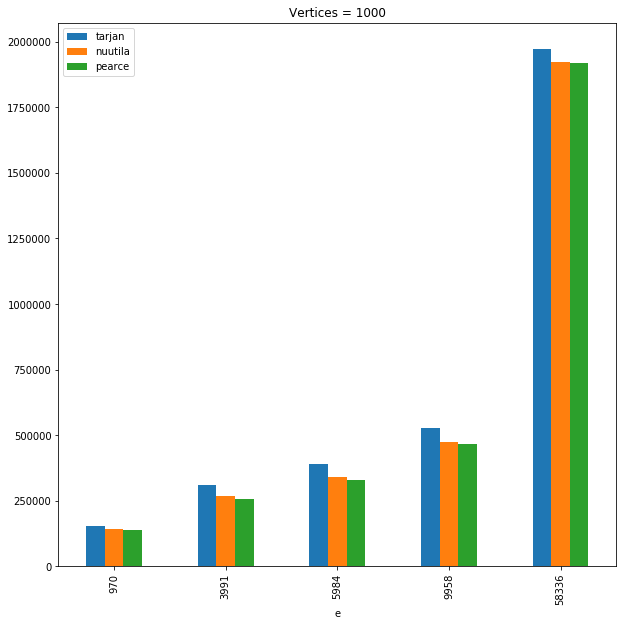

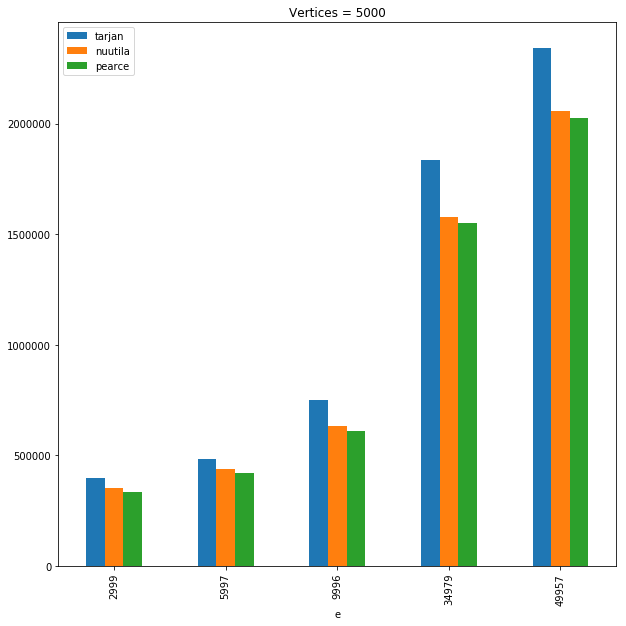

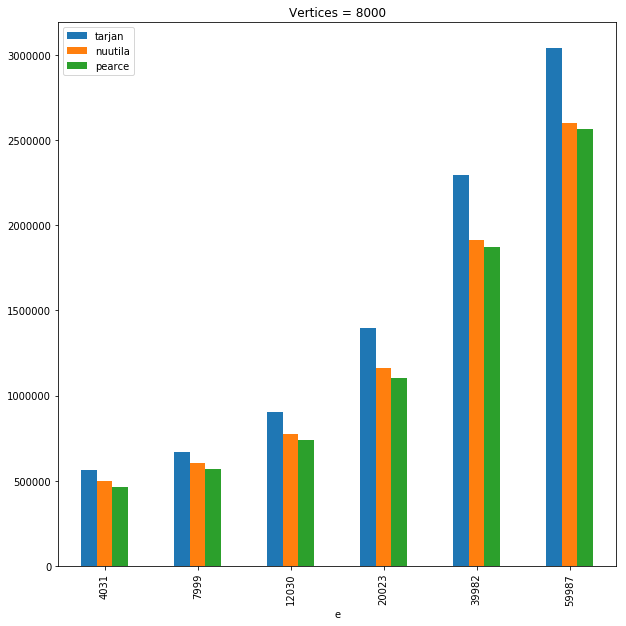

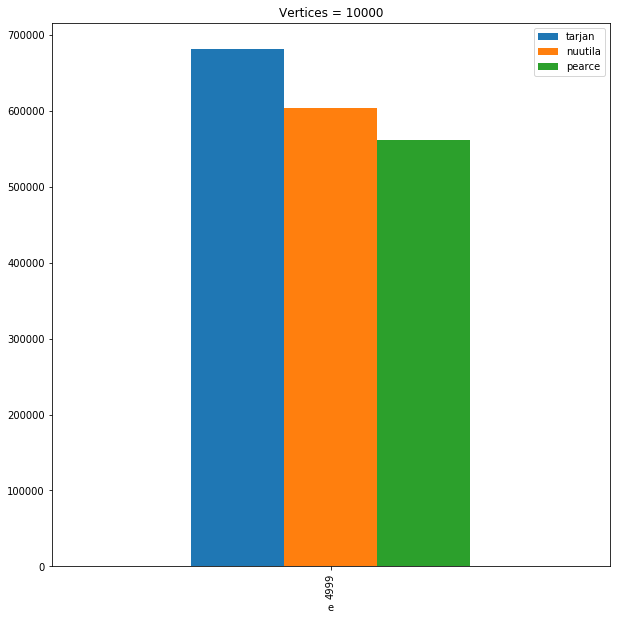

In [75]:
for v in sorted(list(set(r.v.values.tolist()))):
    r[r.v==v].plot(x="e", y=["tarjan", "nuutila", "pearce"], figsize=[10,10], kind="bar", title = f'Vertices = {v}')

In [77]:
quasi_c=pd.read_csv("mem_test/quasi_connesso/res.csv").drop(columns=["e"])
catena=pd.read_csv("mem_test/catena/res.csv").drop(columns=["e"])
quasi_c["graph"]="quasi_conneso"
catena["graph"]="catena"

In [49]:
quasi_c

,algo,v,mem,graph
0,nuutila,100000,8306079,quasi_c
1,nuutila,10000,897039,quasi_c
2,nuutila,1000,153575,quasi_c
3,pearce,100000,7893575,quasi_c
4,pearce,10000,855783,quasi_c
5,pearce,1000,149447,quasi_c
6,tarjan,100000,9118583,quasi_c
7,tarjan,10000,978295,quasi_c
8,tarjan,1000,161703,quasi_c


In [50]:
catena

,algo,v,mem,graph
0,nuutila,100000,5786942,catena
1,nuutila,10000,645694,catena
2,nuutila,1000,131566,catena
3,pearce,100000,5374438,catena
4,pearce,10000,604438,catena
5,pearce,1000,127438,catena
6,tarjan,100000,7418566,catena
7,tarjan,10000,808278,catena
8,tarjan,1000,146590,catena


In [78]:
res2=catena.append(quasi_c,ignore_index=True)
res2=res2[res2.algo=="tarjan"].merge(res2[res2.algo=="nuutila"], on=["graph", "v"]).merge(res2[res2.algo=="pearce"], on=["graph", "v"]).drop(columns=["algo", "algo_x", "algo_y"]).rename(columns={"mem_x":"tarjan", "mem_y":"nuutila", "mem":"pearce"})
res2

,v,tarjan,graph,nuutila,pearce
0,100000,7418566,catena,5786942,5374438
1,10000,808278,catena,645694,604438
2,1000,146590,catena,131566,127438
3,100000,9118583,quasi_conneso,8306079,7893575
4,10000,978295,quasi_conneso,897039,855783
5,1000,161703,quasi_conneso,153575,149447


/usr/lib64/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


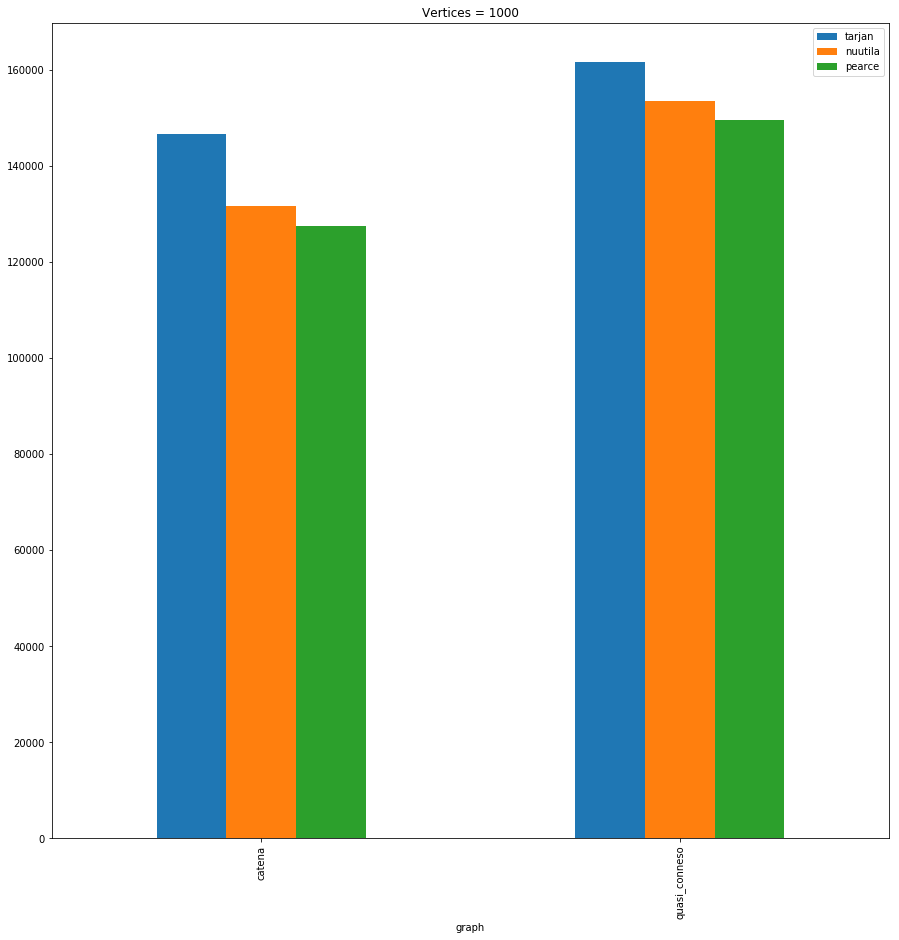

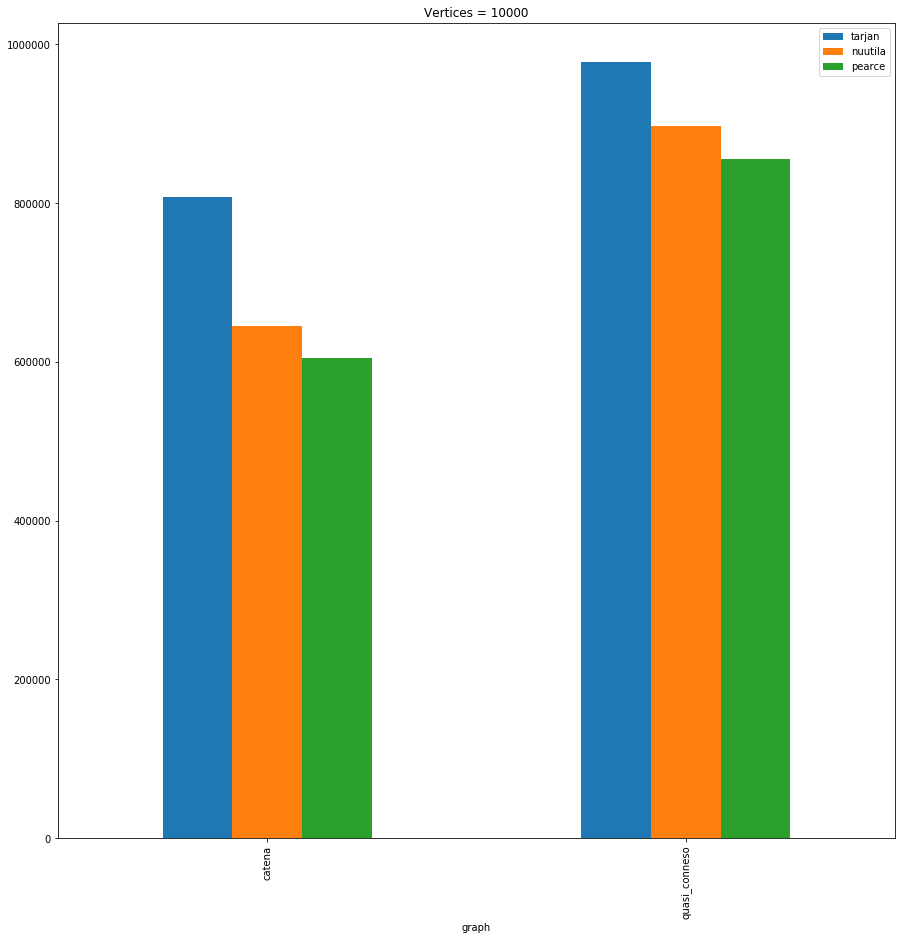

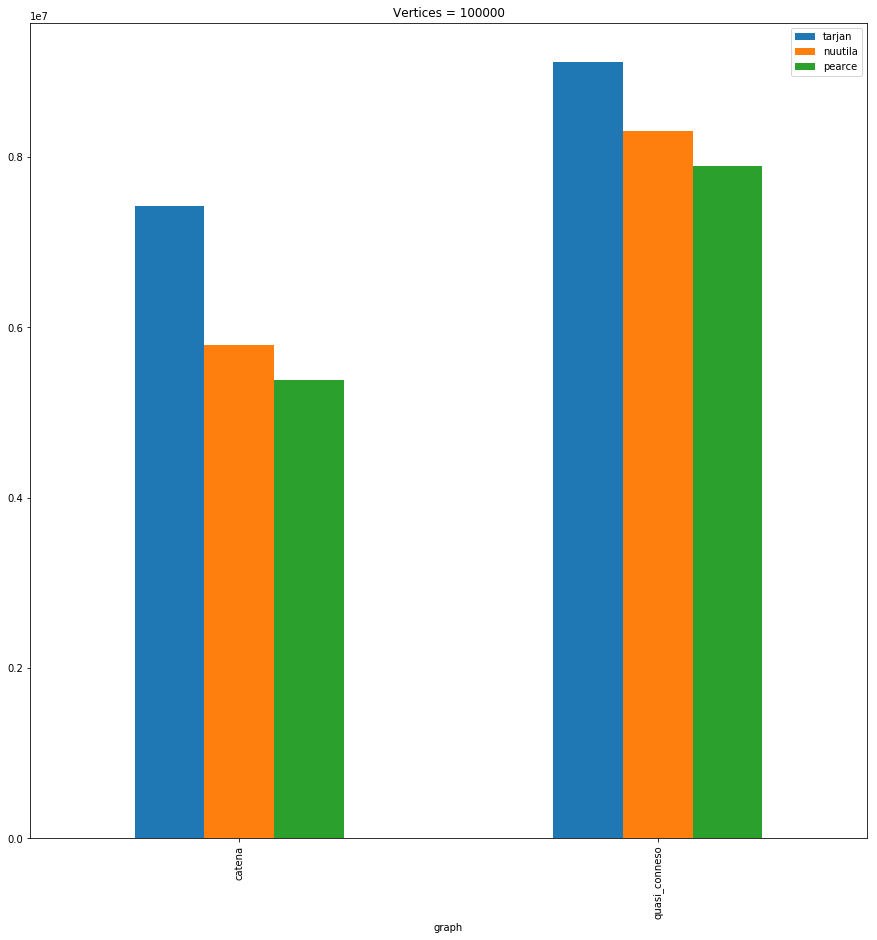

In [79]:
for v in sorted(list(set(res2.v.values.tolist()))):
    res2[res2.v==v].plot(x="graph", y=["tarjan", "nuutila", "pearce"], figsize=[15,15], kind="bar", title = f'Vertices = {v}')